In [3]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("../../datasets/diabetes_dataset.csv")
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [5]:
df.shape

(100000, 16)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  str    
 2   age                   100000 non-null  float64
 3   location              100000 non-null  str    
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  str    
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  diabetes    

In [7]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [15]:
df["diabetes"].value_counts()


diabetes
0    91500
1     8500
Name: count, dtype: int64

In [16]:

df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='str')

In [17]:
(df == 0).sum()


year                        0
gender                      0
age                         0
location                    0
race:AfricanAmerican    79777
race:Asian              79985
race:Caucasian          80124
race:Hispanic           80112
race:Other              80002
hypertension            92515
heart_disease           96058
smoking_history             0
bmi                         0
hbA1c_level                 0
blood_glucose_level         0
diabetes                91500
dtype: int64

In [18]:
(df == 0).sum()


year                        0
gender                      0
age                         0
location                    0
race:AfricanAmerican    79777
race:Asian              79985
race:Caucasian          80124
race:Hispanic           80112
race:Other              80002
hypertension            92515
heart_disease           96058
smoking_history             0
bmi                         0
hbA1c_level                 0
blood_glucose_level         0
diabetes                91500
dtype: int64

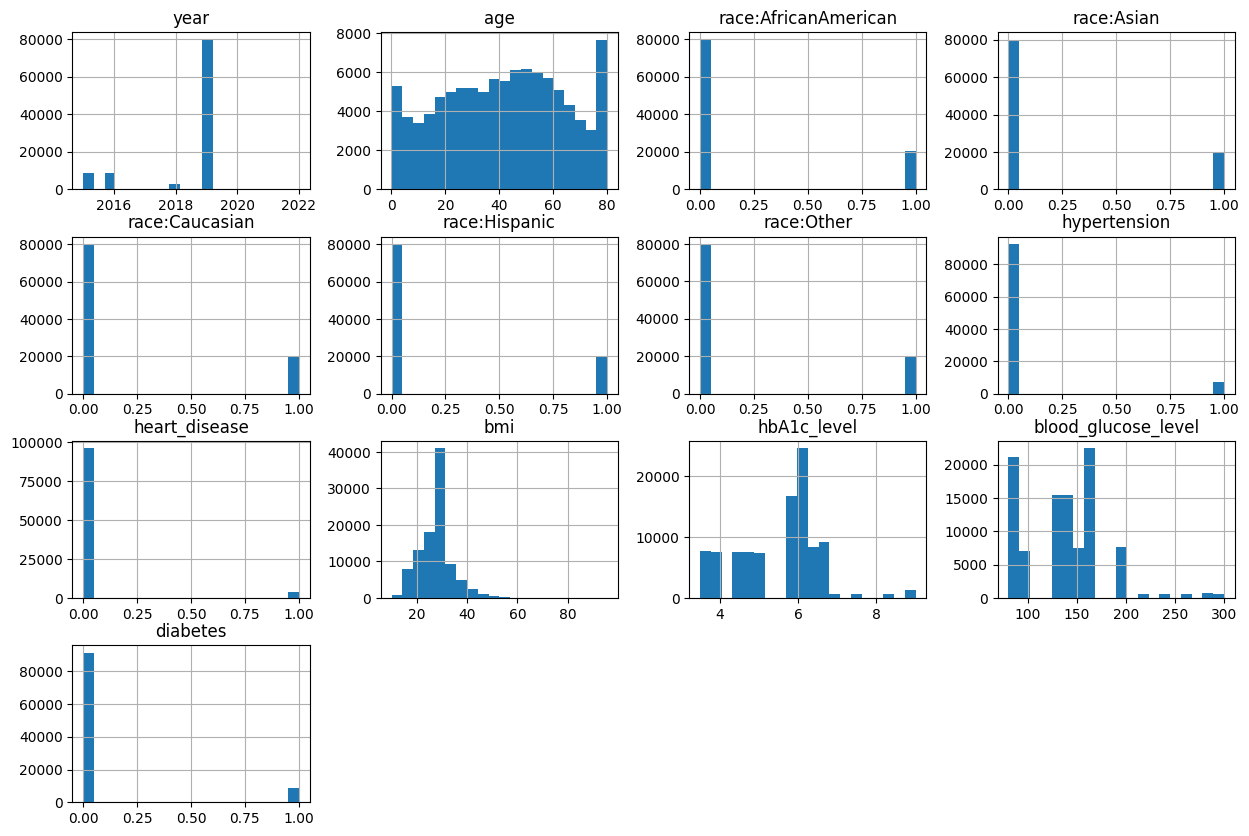

In [19]:
df.hist(figsize=(15,10), bins=20)
plt.show()

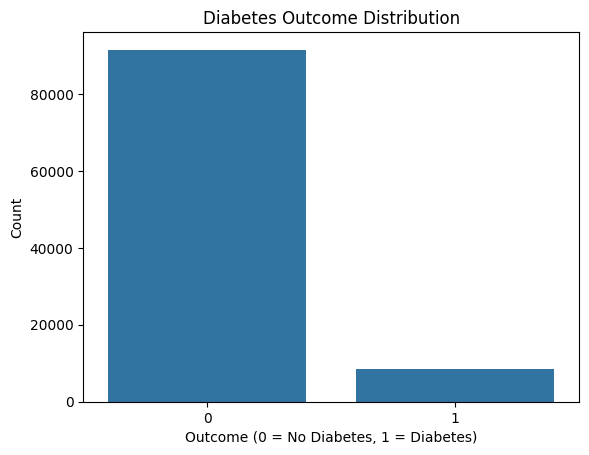

Number of patients without diabetes: 91500
Number of patients with diabetes: 8500


In [25]:
sns.countplot(data=df, x='diabetes')
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

no_diabetes = df['diabetes'].value_counts()[0]
diabetes = df['diabetes'].value_counts()[1]

print(f'Number of patients without diabetes: {no_diabetes}')
print(f'Number of patients with diabetes: {diabetes}')

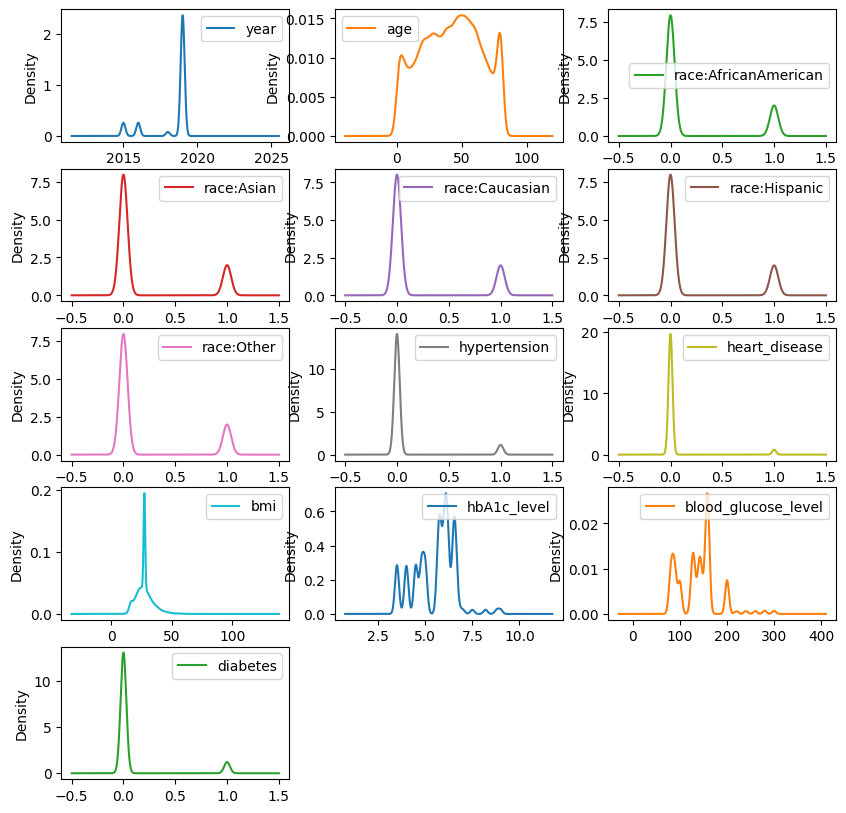

In [27]:
df.plot(kind='density', subplots=True, layout=(5,3), sharex=False, figsize=(12,12))
plt.show()

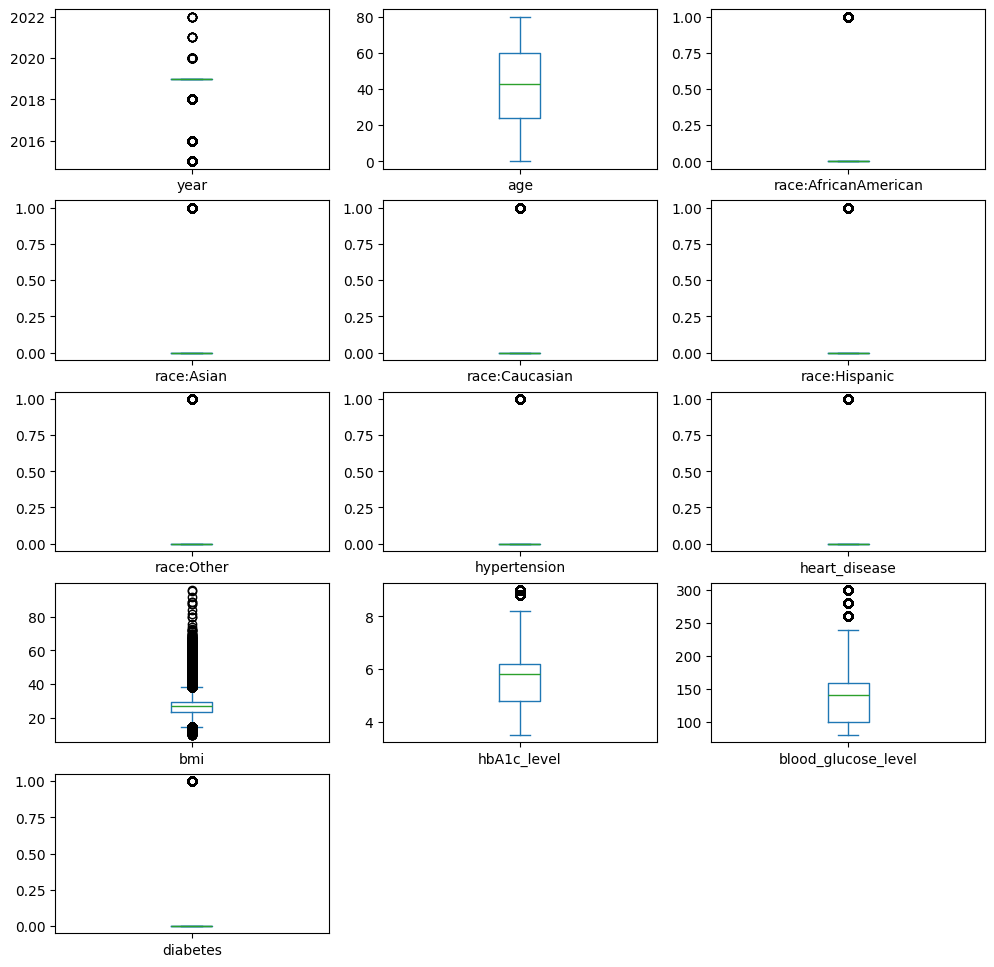

In [29]:
df.plot(kind='box', subplots=True, layout=(5,3), sharex=False, figsize=(12,12))
plt.show()

In [32]:
y = df.diabetes
list = ["diabetes"]
x = df.drop(list,axis = 1)
x.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90


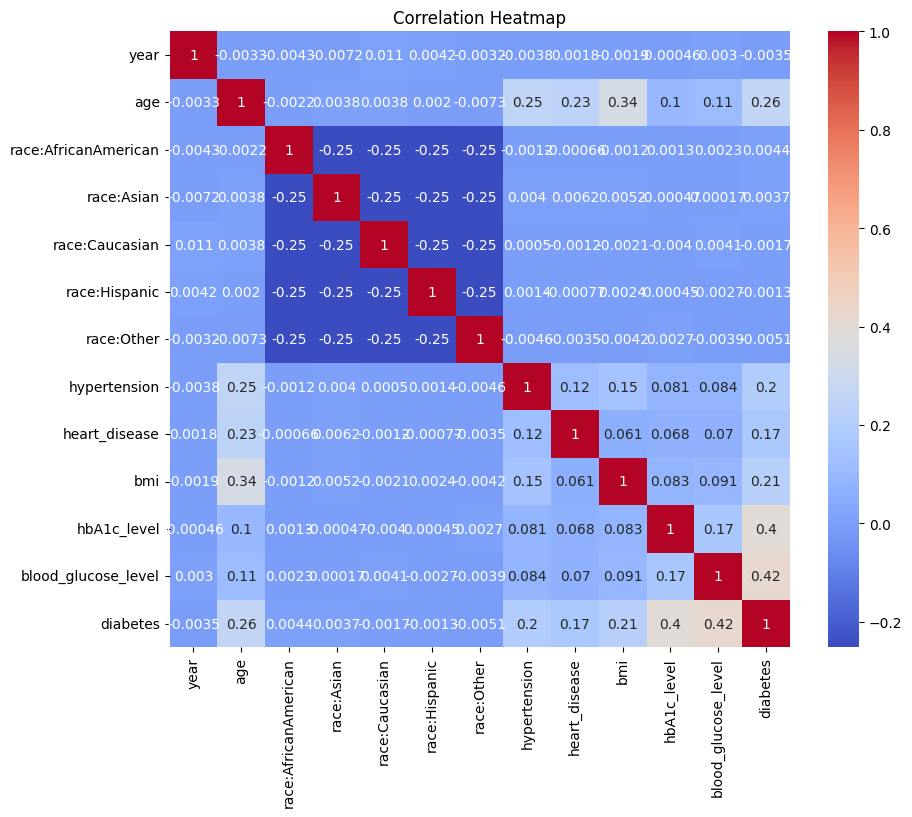

In [34]:
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


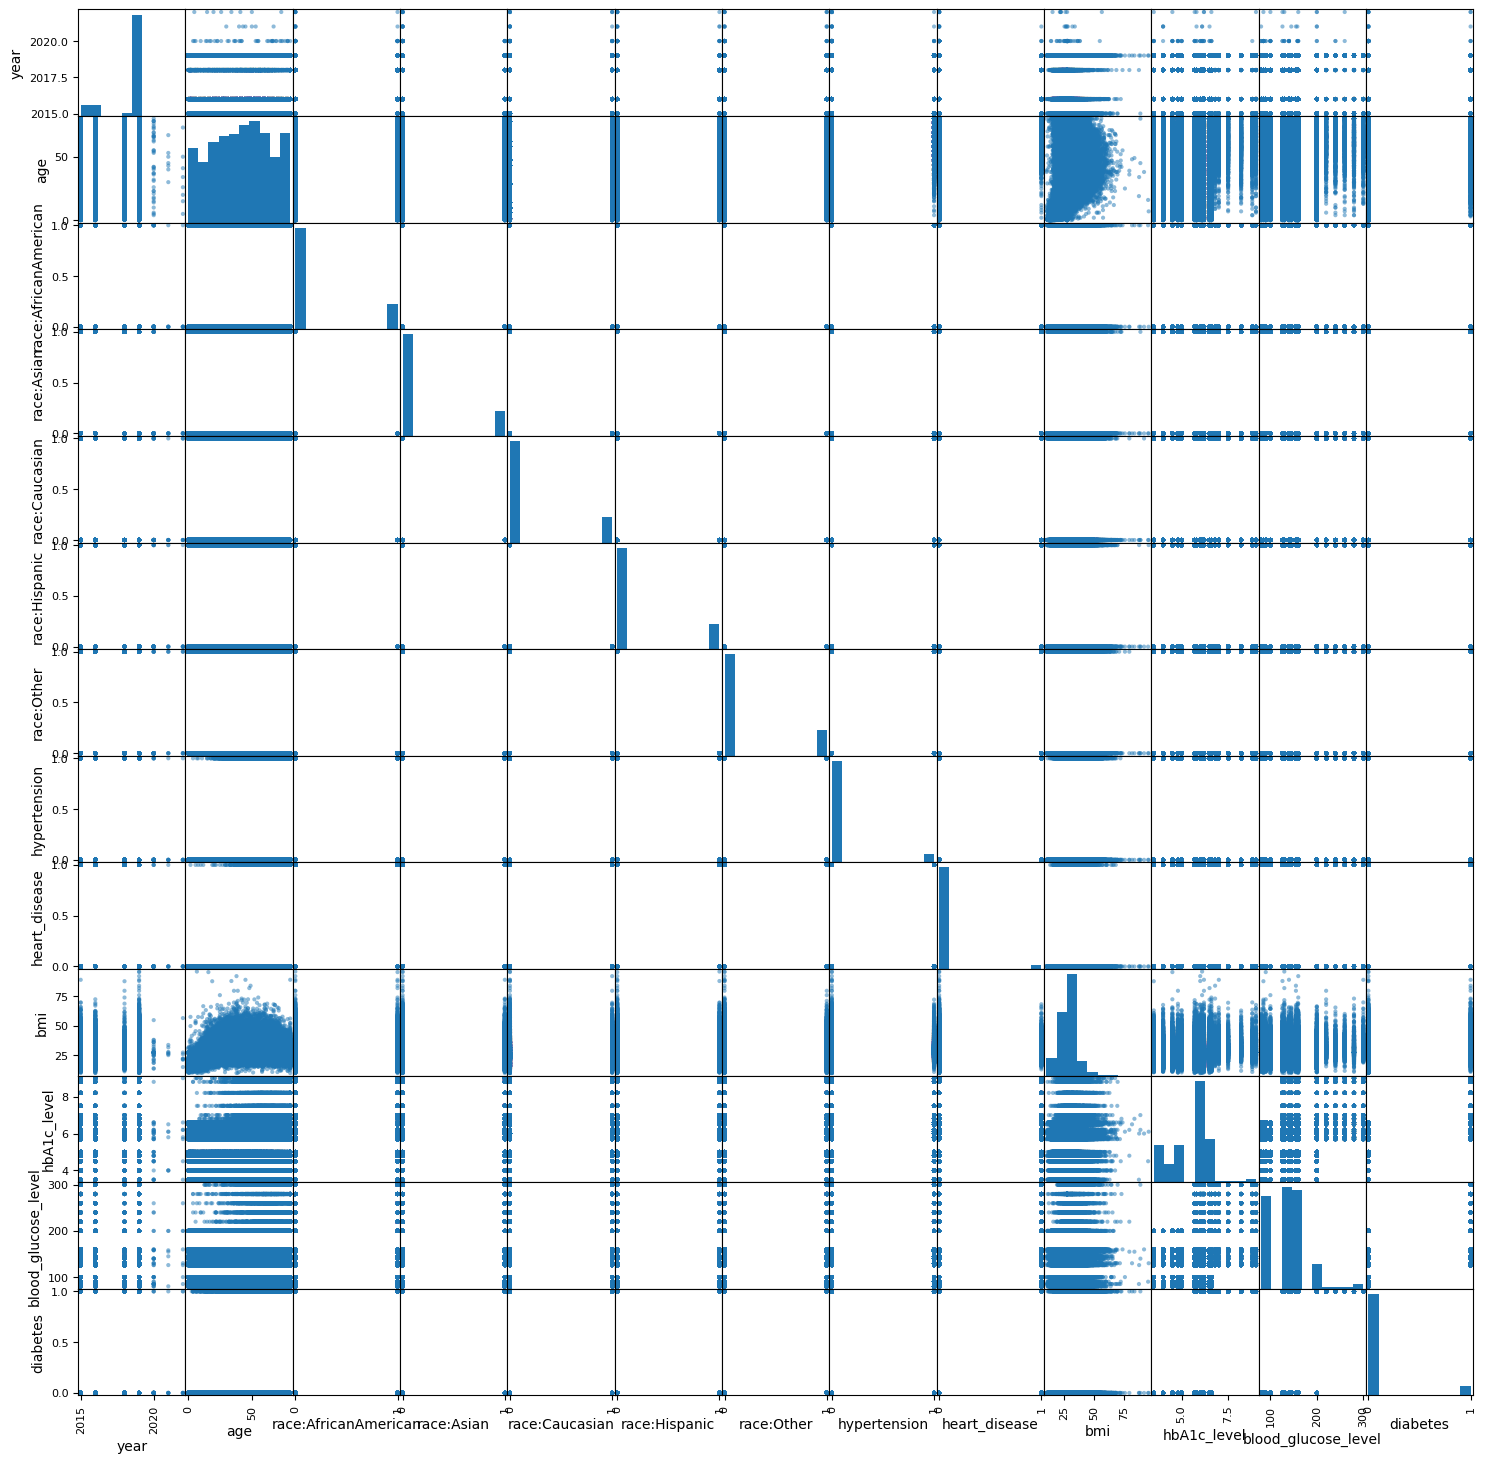

In [35]:
scatter_matrix(df, figsize=(18,18))
plt.show()